<a href="https://colab.research.google.com/github/woutervantol/scriptie1/blob/master/Copy_of_tot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hcipy
from hcipy import *
import numpy as np
import matplotlib.pyplot as plt
# from perlin_noise import PerlinNoise
import time
from tensorflow import keras
from IPython.display import clear_output

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 241 kB 4.7 MB/s 
     |████████████████████████████████| 212 kB 51.7 MB/s 
     |████████████████████████████████| 448 kB 39.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 2.6 MB/s 
     |████████████████████████████████| 191 kB 38.9 MB/s 
     |████████████████████████████████| 68 kB 5.1 MB/s 
  Created wheel for asdf: filename=asdf-2.10.0-py3-none-any.whl size=403892 sha256=c283cd3c3697753d1a357db2ea9cd3e285a553140233d9da9c9aea41f718d2b1
  Stored in directory: /root/.cache/pip/wheels/92/84/75/9da5925b0f485a0e79d798ff4c4c01c7bb3962f060b2401645
Successfully built asdf
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 4.3.3
    Uninstalling jsonschema-4.3.3:
      Successfully uninstalled js

Mounted at /content/gdrive


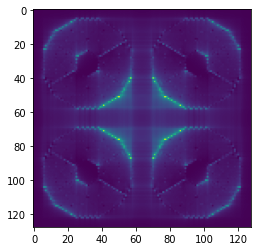

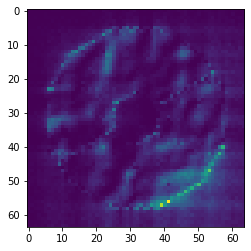

In [ ]:
#Sync data with drive
from google.colab import drive
drive.mount('/content/gdrive')

#save data
# !cp /content/reconstructionMatrix.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/image_ref.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/trainx.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/trainy.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/testx.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/testy.npy "/content/gdrive/MyDrive/MasterThesis/Data/"

# !cp /content/reconstructionMatrixMod.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/image_refMod.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/trainxMod.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/trainyMod.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/testxMod.npy "/content/gdrive/MyDrive/MasterThesis/Data/"
# !cp /content/testyMod.npy "/content/gdrive/MyDrive/MasterThesis/Data/"

# mod = "Mod"
mod = ""
matrix = np.load("/content/gdrive/MyDrive/MasterThesis/Data/reconstructionMatrix{}.npy".format(mod))
image_ref = np.load("/content/gdrive/MyDrive/MasterThesis/Data/image_ref{}.npy".format(mod))
trainx = np.load("/content/gdrive/MyDrive/MasterThesis/Data/trainx{}.npy".format(mod))
trainy = np.load("/content/gdrive/MyDrive/MasterThesis/Data/trainy{}.npy".format(mod))
testx = np.load("/content/gdrive/MyDrive/MasterThesis/Data/testx{}.npy".format(mod))
testy = np.load("/content/gdrive/MyDrive/MasterThesis/Data/testy{}.npy".format(mod))
plt.imshow(image_ref.reshape(128, 128))
plt.show()
plt.imshow(trainx[500,:,0].reshape(64, 64))
plt.show()

In [ ]:
#initialization
wavelength_wfs = 1e-6
telescope_diameter = 39.3
zero_magnitude_flux = 3.9E10
num_pupil_pixels = 256
num_pwfs_pixels = 128
pupil_grid_diameter = telescope_diameter
pupil_grid = make_pupil_grid(num_pupil_pixels, pupil_grid_diameter)
pwfs_grid = make_pupil_grid(num_pwfs_pixels, 1.2*2*pupil_grid_diameter)

make_aperture = make_elt_aperture()
aperture = make_aperture(pupil_grid)

num_actuators_across_pupil = 20
actuator_spacing = telescope_diameter / num_actuators_across_pupil
influence_functions = make_gaussian_influence_functions(pupil_grid, num_actuators_across_pupil, actuator_spacing)
#verander dit hierboven naar make_zernike_basis

nr_runs = 100
rmslist = np.logspace(np.log10(0.01), np.log10(4.0), 10)

deformable_mirror = DeformableMirror(influence_functions)
num_modes = deformable_mirror.num_actuators

pwfs = PyramidWavefrontSensorOptics(pupil_grid, pwfs_grid, separation=1.2*pupil_grid_diameter, pupil_diameter=telescope_diameter, wavelength_0=wavelength_wfs, q=4)
mpwfs = ModulatedPyramidWavefrontSensorOptics(pwfs, 3*wavelength_wfs/telescope_diameter)
wf = Wavefront(aperture, wavelength_wfs)

def modavg(modlist):
  avg = np.zeros(num_pwfs_pixels**2)
  for i in range(len(modlist)):
    avg += modlist[i].intensity / len(modlist)
  return avg / np.sum(avg)

# image_ref = pwfs.forward(wf).intensity
# image_ref /= np.sum(image_ref)
# # image_ref = modavg(mpwfs.forward(wf))
# plt.imshow(image_ref.reshape(128, 128))
# plt.colorbar()
# plt.show()
# np.save("./image_ref", image_ref)

Measure response to mode 1 / 400
Measure response to mode 101 / 400
Measure response to mode 201 / 400
Measure response to mode 301 / 400
[0.02606177 0.02362226 0.02326141 0.02350235 0.02318361 0.02089897
 0.02624971 0.02348491 0.02158271 0.02111378 0.02183098 0.02397762
 0.02165423 0.02349426 0.02234746 0.02532316 0.02880836 0.02283008
 0.0223731  0.02504994 0.02233866 0.02457334 0.02284094 0.02674511
 0.02247242 0.02227771 0.02471644 0.02068601 0.02030213 0.02261788
 0.02191066 0.02270225 0.02242591 0.02465878 0.02265254 0.02361456
 0.02288763 0.0224126  0.02379409 0.02204777 0.02476864 0.02194649
 0.0242807  0.02129523 0.02153132 0.02289126 0.02257352 0.02345576
 0.02287243 0.02373585 0.02271411 0.02048289 0.0224073  0.02201885
 0.02411337 0.02366471 0.02284396 0.02384787 0.02673645 0.02527163
 0.02340048 0.0210777  0.02278816 0.02577828 0.02272517 0.02238688
 0.02285195 0.02109249 0.02240304 0.02287022 0.02215083 0.02323986
 0.02344526 0.02244972 0.02193516 0.02818031 0.02122765 0.

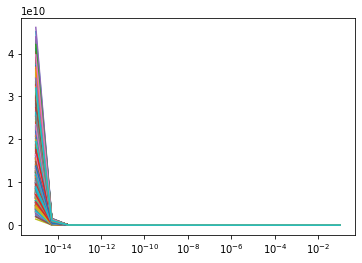

In [ ]:
#generate reconstruction matrix
def make_reconstruction_matrix(rcond=1e-15):
  probe_amp = 0.01 * wavelength_wfs /(2*np.pi) #in rad
  slopes = []

  for ind in range(num_modes):
      if ind % 100 == 0:
          print("Measure response to mode {:d} / {:d}".format(ind+1, num_modes))
      slope = 0

      for s in [1, -1]:
          amp = np.zeros((num_modes,))
          amp[ind] = s * probe_amp
          deformable_mirror.actuators = amp
          dm_wf = deformable_mirror.forward(wf)

          if mod=="":
            wfs_wf = pwfs.forward(dm_wf)
            image = wfs_wf.intensity
            image /= np.sum(image)
          else:
            wfs_wf = mpwfs.forward(dm_wf)
            image = modavg(wfs_wf)

          slope += s * (image-image_ref)/(2 * probe_amp)

      slopes.append(slope)
  slopes = ModeBasis(slopes)
  # rcond = 1E-15
  matrix = inverse_tikhonov(slopes.transformation_matrix, rcond=rcond, svd=None)
  return matrix

transf_matrix = influence_functions.transformation_matrix.toarray().transpose()*2
measurements = np.zeros((len(testx), num_pwfs_pixels, num_pwfs_pixels))
h = int(num_pwfs_pixels/2)
measurements[:, :h, :h] = testx[:, :, 0].reshape(len(testx), h, h)
measurements[:, h:, :h] = testx[:, :, 1].reshape(len(testx), h, h)
measurements[:, :h, h:] = testx[:, :, 2].reshape(len(testx), h, h)
measurements[:, h:, h:] = testx[:, :, 3].reshape(len(testx), h, h)
measurements = measurements.reshape(len(testx), num_pwfs_pixels**2)

outputs = []
inputs = np.logspace(-1, -15, 20)
for i in inputs:
  rcondtestmatrix = make_reconstruction_matrix(i)
  matrixpredictions = np.matmul(measurements - image_ref[None,:], rcondtestmatrix.transpose())
  opd_matrixpredictions = np.matmul(matrixpredictions, transf_matrix)
  rms = np.sqrt(np.sum((opd_matrixpredictions - opd_dm_states)**2, axis=1) / np.sum(aperture)) / wavelength_wfs * 2*np.pi
  outputs.append(rms)
  print(rms, i)
plt.semilogx(inputs, outputs)
plt.show()



# np.save("./reconstructionMatrix{}".format(mod), make_reconstruction_matrix(rcond=1e-15))

In [ ]:
#generate data
def random_noise(rms):
    amplitude = rms*wavelength_wfs/(2*np.pi)
    noise = np.random.randn(num_actuators_across_pupil, num_actuators_across_pupil).flatten() * amplitude
    return noise
  
def makeData(rms):
    deformable_mirror.actuators = random_noise(rms)

    dm_wf = deformable_mirror.forward(wf)
    if mod == "":
      pwfs_wf = pwfs.forward(dm_wf)
      image = pwfs_wf.intensity
      image /= np.sum(image)
    else:
      mpwfs_wf = mpwfs.forward(dm_wf)
      image = modavg(mpwfs_wf)
    nr_photons = 1e6
    image = np.random.poisson(image*nr_photons)
    image_ref = image/np.sum(image)
    return image_ref.reshape(num_pwfs_pixels, num_pwfs_pixels), deformable_mirror.actuators


#trainingdata
def generate_data():
  trainx = np.ndarray((nr_runs*len(rmslist), int(num_pwfs_pixels/2)**2, 4))
  trainy = np.ndarray((nr_runs*len(rmslist), num_actuators_across_pupil**2))
  for run in range(nr_runs):
      for rms_idx in range(len(rmslist)):
          measurement, dm_state = makeData(rmslist[rms_idx])
          rowposition = rms_idx * nr_runs + run
          trainy[rowposition] = dm_state
          h = int(num_pwfs_pixels/2)
          trainx[rowposition,:,0] = measurement[:h, :h].flatten()
          trainx[rowposition,:,1] = measurement[h:, :h].flatten()
          trainx[rowposition,:,2] = measurement[:h, h:].flatten()
          trainx[rowposition,:,3] = measurement[h:, h:].flatten()
      if run%10 == 0:
        print(run, nr_runs)
  np.save("./trainx{}".format(mod), trainx)
  np.save("./trainy{}".format(mod), trainy)


  #testdata
  testx = np.ndarray((nr_runs*len(rmslist), int(num_pwfs_pixels/2)**2, 4))
  testy = np.ndarray((nr_runs*len(rmslist), num_actuators_across_pupil**2))
  for run in range(nr_runs):
      for rms_idx in range(len(rmslist)):
          measurement, dm_state = makeData(rmslist[rms_idx])
          rowposition = rms_idx * nr_runs + run
          testy[rowposition] = dm_state
          h = int(num_pwfs_pixels/2)
          testx[rowposition,:,0] = measurement[:h, :h].flatten()
          testx[rowposition,:,1] = measurement[h:, :h].flatten()
          testx[rowposition,:,2] = measurement[:h, h:].flatten()
          testx[rowposition,:,3] = measurement[h:, h:].flatten()
      if run%10 == 0:
        print(run, nr_runs)
  np.save("./testx{}".format(mod), testx)
  np.save("./testy{}".format(mod), testy)

# generate_data()

0


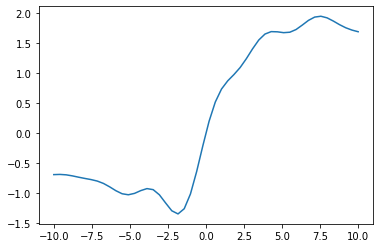

In [ ]:
#plot response
def plot_response(noise_amp=0):
  inputs = np.linspace(-10, 10, 50)
  outputs = []
  noise = random_noise(noise_amp)
  for i in inputs:
    amplitude = i * wavelength_wfs /(2*np.pi)
    # amps = np.zeros((num_actuators_across_pupil**2,))
    amps = noise
    amps[int((num_actuators_across_pupil**2)/2) - 5] = amplitude
    deformable_mirror.actuators = amps
    dm_wf = deformable_mirror.forward(wf)
    if mod=="":
      wfs_wf = pwfs.forward(dm_wf)
      image = wfs_wf.intensity
      image /= np.sum(image)
    else:
      wfs_wf = mpwfs.forward(dm_wf)
      image = modavg(wfs_wf)
    matrixprediction = np.matmul(matrix, image - image_ref)
    output = matrixprediction[int((num_actuators_across_pupil**2)/2)-5] / wavelength_wfs *(2*np.pi)
    outputs.append(output)
    # plt.imshow(image.reshape(128, 128))
    # plt.show()
    # deformable_mirror.actuators = matrixprediction
    # plt.imshow((deformable_mirror.opd*aperture).reshape(256, 256))
    # plt.show()
    # deformable_mirror.actuators = amps
    # plt.imshow((deformable_mirror.opd*aperture).reshape(256, 256))
    # plt.show()
  print(noise_amp)
  plt.plot(inputs, outputs, label="{} rms noise".format(noise_amp))

plot_response()
plt.show()

# plt.plot(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10), ls="dashed", lw=1)
# for noiseamp in [0, 0.1, 0.5, 1, 1.5, 2, 2.5]:
#   plot_response(noiseamp)
# plt.legend()
# plt.show()


In [ ]:
#PAPER MODEL
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(int(num_pwfs_pixels/2), int(num_pwfs_pixels/2), 4), data_format="channels_last"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", strides=2, padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(4, (1, 1), padding="same"))
model.add(keras.layers.BatchNormalization())
# model.add(layers.Dropout(0.4))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(400, activation="linear", kernel_regularizer=keras.regularizers.L1(l1=1e-6)))
model.summary()

#SHUFFLE DATA
# trainx = np.load("./trainx{}.npy".format(mod))
# trainy = np.load("./trainy{}.npy".format(mod))
shuffle_indices = np.arange(len(trainx))
np.random.shuffle(shuffle_indices)
trainx = trainx[shuffle_indices]
trainy = trainy[shuffle_indices]

datavars = np.sqrt(np.var(trainx, axis=1))
labelvars = np.sqrt(np.var(trainy, axis=1))
data = trainx / datavars[:,None]
labels = trainy / labelvars[:,None]

model.compile(
    loss=keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error"),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[keras.metrics.MeanSquaredError()],
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        1184      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 32)       1

In [ ]:
#MY MODEL
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (4, 4), padding="same", input_shape=(int(num_pwfs_pixels/2), int(num_pwfs_pixels/2), 4), data_format="channels_last"))
model.add(keras.layers.LeakyReLU(alpha=0.05))
# model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (4, 4), strides=2, padding="same"))
model.add(keras.layers.LeakyReLU(alpha=0.05))
# model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (4, 4), strides=2, padding="same"))
model.add(keras.layers.LeakyReLU(alpha=0.05))
# model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (4, 4), padding="same"))
model.add(keras.layers.LeakyReLU(alpha=0.05))
# model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
# model.add(keras.layers.Conv2D(64, (4, 4), padding="same"))
# model.add(keras.layers.LeakyReLU(alpha=0.05))
# model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, kernel_regularizer=keras.regularizers.L1L2(l1=1e-6, l2=1e-4)))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dense(400, activation="linear"))
model.summary()

#SHUFFLE DATA
# trainx = np.load("./trainxmod.npy")
# trainy = np.load("./trainymod.npy")
shuffle_indices = np.arange(len(trainx))
np.random.shuffle(shuffle_indices)
trainx = trainx[shuffle_indices]
trainy = trainy[shuffle_indices]

datavars = np.sqrt(np.var(trainx, axis=1))
labelvars = np.sqrt(np.var(trainy, axis=1))
data = trainx / datavars[:,None]
labels = trainy / labelvars[:,None]


model.compile(
    loss=keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error"),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9),
    metrics=[keras.metrics.MeanSquaredError()],
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        2080      
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        32832     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                      

In [ ]:
class debugCallback(keras.callbacks.Callback):
  def __init__(self):
    self.losses = []
    self.vallosses = []
    self.epochs = []
  def on_epoch_end(self, epoch, logs=None):
    self.losses.append(logs["loss"])
    self.vallosses.append(logs["val_loss"])
    self.epochs.append(epoch)
    index = np.random.randint(0, len(trainx))
    if epoch%10==0:
      self.plot_losses()
      # self.plot_input(index)
      # self.plot_output(index)
  
  def plot_losses(self):
    clear_output()
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.vallosses, label="val_loss")
    plt.legend()
    plt.title("losses")
    plt.show()
  def plot_input(self, index):
    measurement = np.zeros((num_pwfs_pixels, num_pwfs_pixels))
    h = int(num_pwfs_pixels/2)
    measurement[:h, :h] = testx[index, :, 0].reshape(h, h)
    measurement[h:, :h] = testx[index, :, 1].reshape(h, h)
    measurement[:h, h:] = testx[index, :, 2].reshape(h, h)
    measurement[h:, h:] = testx[index, :, 3].reshape(h, h)
    plt.imshow(measurement)
    plt.title("rms: {}".format(rmslist[index//100]))
    plt.show()
  def plot_output(self, index):
    opd_output = np.matmul(trainy[index], transf_matrix)
    plt.imshow(opd_output.reshape(num_pupil_pixels, num_pupil_pixels))
    plt.show()

In [ ]:
#FIT MODEL
callback = keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=20)
debug = debugCallback()

history = model.fit(data.reshape(len(data), int(num_pwfs_pixels/2), int(num_pwfs_pixels/2), 4), 
                    labels, 
                    epochs=200, 
                    batch_size=64, 
                    shuffle=True, 
                    validation_split=0.2, 
                    callbacks=[callback, debug], 
                    verbose=1)
# history = model.fit(data.reshape(len(data), int(num_pwfs_pixels/2), int(num_pwfs_pixels/2), 4), labels, epochs=200, batch_size=64, shuffle=True)
print(history.params)
model.save("./models/testmodel")

Epoch 1/200
 1/13 [=>............................] - ETA: 38s - loss: 2.9277 - mean_squared_error: 2.8978

KeyboardInterrupt: ignored

In [ ]:
#make RMS plot
%matplotlib inline
#for testing and plotting
def test_per_image():
    for i in range(len(rmslist)):
        dm_state = testy[i*100]
        print(testx[i].reshape(1, 64, 64, 4).shape)
        cnn_pred = model.predict((testx[i*100] / np.sqrt(np.var(testx[i*100]))).reshape(1, 64, 64, 4)) * np.sqrt(np.var(testy[i*100]))
        plt.imshow((dm_state - cnn_pred).reshape(20, 20))
        plt.colorbar()
        plt.title("difference")
        plt.show()
        # print(dm_state)
        plt.imshow(dm_state.reshape(20, 20))
        plt.colorbar()
        plt.title("label")
        plt.show()
        # print(cnn_pred)
        plt.imshow(cnn_pred.reshape(20, 20))
        plt.colorbar()
        plt.title("prediction")
        plt.show()
    asdadsads


transf_matrix = influence_functions.transformation_matrix.toarray().transpose()*2
opd_dm_states = np.matmul(testy, transf_matrix)

#IMPORT MODEL
# model = keras.models.load_model("./models/testmodel")
# model.summary()

# test_per_image()


#normalize data and predict actuator states
data_variances = np.sqrt(np.var(testx, axis=1))
label_variances = np.sqrt(np.var(testy, axis=1))
cnnpredictions = model.predict((testx / data_variances[:,None]).reshape(len(testx), int(num_pwfs_pixels/2), int(num_pwfs_pixels/2), 4)) * label_variances[:,None]
opd_cnnpredictions = np.matmul(cnnpredictions, transf_matrix)

#reshape 4 seperate images from pyramid into 1 image
measurements = np.zeros((len(testx), num_pwfs_pixels, num_pwfs_pixels))
h = int(num_pwfs_pixels/2)
measurements[:, :h, :h] = testx[:, :, 0].reshape(len(testx), h, h)
measurements[:, h:, :h] = testx[:, :, 1].reshape(len(testx), h, h)
measurements[:, :h, h:] = testx[:, :, 2].reshape(len(testx), h, h)
measurements[:, h:, h:] = testx[:, :, 3].reshape(len(testx), h, h)
measurements = measurements.reshape(len(testx), num_pwfs_pixels**2)

#predict actuator states linearly
matrixpredictions = np.matmul(measurements - image_ref[None,:], matrix.transpose())
opd_matrixpredictions = np.matmul(matrixpredictions, transf_matrix)

opd_dm_states *= aperture
opd_cnnpredictions *= aperture
opd_matrixpredictions *= aperture

viewindex = 500
plt.imshow(image_ref.reshape(128, 128))
plt.colorbar()
plt.show()
plt.imshow(measurements[viewindex].reshape(128, 128))
plt.colorbar()
plt.show()
plt.imshow((measurements[viewindex] - image_ref).reshape(128, 128))
plt.colorbar()
plt.show()
plt.imshow(testy[viewindex].reshape(20, 20))
plt.colorbar()
plt.show()
plt.imshow(matrixpredictions[viewindex].reshape(20, 20))
plt.colorbar()
plt.show()
plt.imshow(opd_dm_states[viewindex].reshape(256, 256))
plt.colorbar()
plt.show()
plt.imshow(opd_matrixpredictions[viewindex].reshape(256, 256))
plt.colorbar()
plt.show()



#calculate RMS, note that I devide by sum of aperture instead of length of aperture since the edges are often a float between 1 and 0 instead of an int
inputs = []
matrix_outputs = []
cnn_outputs = []
for i in range(len(rmslist)):
    print(i)
    input_rms = np.sqrt(np.sum(opd_dm_states[i*nr_runs:(i+1)*nr_runs]**2, axis=1) / np.sum(aperture)) / wavelength_wfs * 2*np.pi
    matrix_rms = np.sqrt(np.sum((opd_matrixpredictions[i*nr_runs:(i+1)*nr_runs] - opd_dm_states[i*nr_runs:(i+1)*nr_runs])**2, axis=1) / np.sum(aperture)) / wavelength_wfs * 2*np.pi
    cnn_rms = np.sqrt(np.sum((opd_cnnpredictions[i*nr_runs:(i+1)*nr_runs] - opd_dm_states[i*nr_runs:(i+1)*nr_runs])**2, axis=1) / np.sum(aperture)) / wavelength_wfs * 2*np.pi
    
    inputs.append(np.mean(input_rms))
    matrix_outputs.append(np.mean(matrix_rms/input_rms))
    cnn_outputs.append(np.mean(cnn_rms/input_rms))
  
plt.hlines(1, np.min(inputs), np.max(inputs), linestyles="dashed")
plt.semilogx(inputs, matrix_outputs, marker="o", color="blue", label="matrix")
plt.xlabel("input RMS(rad)")
plt.ylabel("residual RMS / input RMS")
plt.semilogx(inputs, cnn_outputs, marker="o", color="green", label="cnn")
plt.xlabel("input RMS(rad)")
plt.ylabel("residual RMS / input RMS")
plt.legend()
plt.show()

NameError: ignored

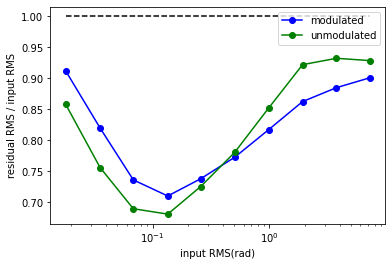

In [ ]:
# modulatedMatrixY = matrix_outputs
# modulatedMatrixX = inputs
# matrixY = matrix_outputs

# modulatedCnnY = cnn_outputs
# CnnY = cnn_outputs

plt.hlines(1, np.min(inputs), np.max(inputs), linestyles="dashed")
plt.semilogx(inputs, modulatedCnnY, marker="o", color="blue", label="modulated")
plt.xlabel("input RMS(rad)")
plt.ylabel("residual RMS / input RMS")
plt.semilogx(inputs, CnnY, marker="o", color="green", label="unmodulated")
plt.xlabel("input RMS(rad)")
plt.ylabel("residual RMS / input RMS")
plt.legend()
plt.show()